<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/ProjectBCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo de este proyecto es construir un modelo capaz de predecir el diagnóstico de tejidos de cáncer de mama como malignos o benignos. Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA, por sus siglas en inglés) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Distribución de clases: 357 benignas, 212 malignas.

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

# Transformaciones al dataset

In [4]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")

obj_df = cancer_tissues.select_dtypes(include=['object']).copy()

obj_df = obj_df = obj_df['diagnosis'].astype('string')

transform_target= {"diagnosis": {"M":0, "B":1}}
cancer_tissues= cancer_tissues.replace(transform_target)
y = cancer_tissues['diagnosis']
cancer_tissues= cancer_tissues.drop(['diagnosis',], axis=1)
cancer_tissues= cancer_tissues.drop(['Unnamed: 32',], axis=1)
cancer_tissues= cancer_tissues.drop(['id',], axis=1)



# Logistic Regrssion

0.9300699300699301
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        52
           1       0.93      0.97      0.95        91

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

[[45  7]
 [ 3 88]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


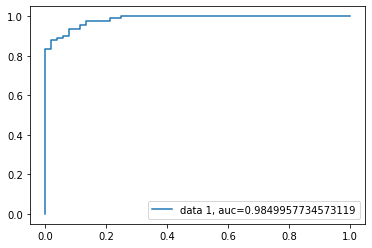

In [5]:
X=cancer_tissues
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score=logreg.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Desicion Trees

0.965034965034965
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.96      0.99      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[48  4]
 [ 1 90]]


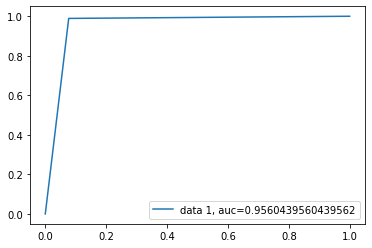

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
#Training the model
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
score=DT.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support vector classifiers

0.972027972027972
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.98      0.98      0.98        91

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[50  2]
 [ 2 89]]


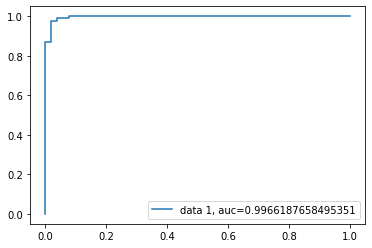

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel ='rbf'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.decision_function(X_test)[::]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Naive Bayes classifier

0.965034965034965
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.96      0.99      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[48  4]
 [ 1 90]]


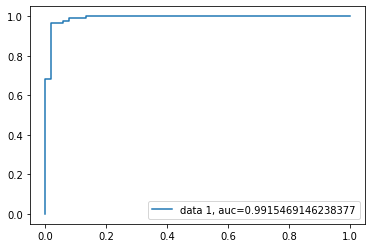

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient boosting classifier

0.965034965034965
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.97      0.98      0.97        91

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

[[49  3]
 [ 2 89]]


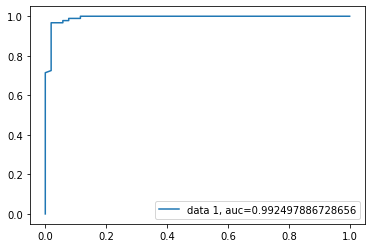

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=16)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()